In [71]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time
import pascal_voc_writer
import os
import os.path as osp
%matplotlib inline

In [5]:
fp = open('/home/ubuntu/stanford_aerial/README','r')
readme = fp.readlines()
fp.close()
readme

['Introduced in our CVPR 2016 submission "Forecasting Social Navigation in Crowded Complex Scenes", the Stanford Aerial Pedestrian Dataset consists of annotated videos of pedestrians, bikers, skateboarders, cars, buses, and golf carts navigating eight unique scenes on the Stanford University campus.\n',
 'For more details, please visit http://cvgl.stanford.edu/resources.html\n',
 '\n',
 'The eight scenes are:\n',
 '\n',
 'bookstore\n',
 'coupa\n',
 'deathCircle\n',
 'gates\n',
 'hyang\n',
 'little\n',
 'nexus\n',
 'quad\n',
 '\n',
 'Each video for each scene in the videos directory has an associated annotation file (annotation.txt) and exemplary frame (reference.jpg) in the annotations directory.\n',
 '\n',
 'Annotation file format:\n',
 'Each line in the annotations.txt file corresponds to an annotation. Each line contains 10+ columns, separated by spaces. The definition of these columns are:\n',
 '\n',
 '    1   Track ID. All rows with the same ID belong to the same path.\n',
 '    2

In [78]:
def tag2dict(tag):
    d = {}
    d['track_id'] = int(tag[0])
    d['xmin'] = int(tag[1])
    d['ymin'] = int(tag[2])
    d['xmax'] = int(tag[3])
    d['ymax'] = int(tag[4])
    d['frame'] = int(tag[5])
    d['lost'] = int(tag[6])
    d['occuled'] = int(tag[7])
    d['generated'] = int(tag[8])
    d['label'] = tag[9].strip('"')
    return d


In [13]:
video_series='quad'
video_num = 'video3'
images_root = '/home/ubuntu/stanford_aerial/PascalVOC_Images/{}/{}'.format(video_series,video_num)
if not osp.exists(images_root):
    os.makedirs(images_root)

annots_path = osp.join(images_root,'Annotations')
if not osp.exists(annots_path):
    os.makedirs(annots_path)
images_path = osp.join(images_root,'JPEGImages')
if not osp.exists(images_path):
    os.makedirs(images_path)


In [32]:
fp = open('/home/ubuntu/stanford_aerial/annotations/{}/{}/annotations.txt'.format(video_series,video_num),'r')
tags = fp.readlines()
fp.close()
tags = [t.strip().split(' ') for t in tags]
tags_dict = {}
for t in tags:
    dtag = tag2dict(t)
    tags_dict.setdefault(dtag['frame'], []).append(dtag)

In [21]:
pascal_voc_writer.Writer?

Init signature: pascal_voc_writer.Writer(path, width, height, depth=3, database='Unknown', segmented=0)
Docstring:      <no docstring>
File:           ~/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pascal_voc_writer/__init__.py
Type:           type


In [15]:
video_frames = []
cap = cv2.VideoCapture(r'/home/ubuntu/stanford_aerial/videos/{}/{}/video.mov'.format(video_series,video_num))

fps = cap.get(5)
fourcc = cap.get(6)
size = (cap.get(3), cap.get(4))
video_length = int(cap.get(7))
i=0
ret, frame = cap.read()

while(ret):

    s=time()

#     rgb = cv2.calcBackProjectvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imwrite(osp.join(images_path,'{}_{}_{}.jpg'.format(video_series, video_num, repr(i))),frame)

#     video_frames.append(rgb)
    
    writer = pascal_voc_writer.Writer(osp.join(images_path,'{}_{}_{}.jpg'.format(video_series, video_num, repr(i))), cap.get(3), cap.get(4))
    for tag in tags_dict[i]:
        difficult=0
        if tag[-3] == '1' or tag[-4] == '1':
            difficult=1
        writer.addObject(name=tag[-1], xmin=int(tag[0]), ymin=int(tag[1]), xmax=int(tag[2]), ymax=int(tag[3]), difficult=difficult)
    writer.save(osp.join(annots_path,'{}_{}_{}.xml'.format(video_series, video_num, repr(i))))

    e=time()
    print("Done frame {} out of {} in {}s".format(i,video_length,e-s))
    i+=1
    
    ret, frame = cap.read()

cap.release()
cv2.destroyAllWindows()


Done frame 0 out of 509 in 0.02108025550842285s
Done frame 1 out of 509 in 0.02039957046508789s
Done frame 2 out of 509 in 0.020217180252075195s
Done frame 3 out of 509 in 0.0202028751373291s
Done frame 4 out of 509 in 0.020920753479003906s
Done frame 5 out of 509 in 0.020915746688842773s
Done frame 6 out of 509 in 0.02054882049560547s
Done frame 7 out of 509 in 0.02026677131652832s
Done frame 8 out of 509 in 0.0202481746673584s
Done frame 9 out of 509 in 0.021012544631958008s
Done frame 10 out of 509 in 0.021007061004638672s
Done frame 11 out of 509 in 0.021023273468017578s
Done frame 12 out of 509 in 0.020911455154418945s
Done frame 13 out of 509 in 0.020964860916137695s
Done frame 14 out of 509 in 0.020487308502197266s
Done frame 15 out of 509 in 0.020322799682617188s
Done frame 16 out of 509 in 0.02025628089904785s
Done frame 17 out of 509 in 0.020146608352661133s
Done frame 18 out of 509 in 0.020241737365722656s
Done frame 19 out of 509 in 0.021014690399169922s
Done frame 20 out o

## One script to rule them all

In [72]:
with open('/home/ubuntu/stanford_aerial/annotations/{}/{}/annotations.txt'.format('quad','video1'),'r') as fp:
    tags = fp.readlines()
    tags = [t.strip().split(' ') for t in tags]
    tags_dict = {}
    for t in tags:
        dtag = tag2dict(t)
        tags_dict.setdefault(dtag['frame'], []).append(dtag)                


In [75]:
tags_dict[500]

[{'track_id': 0,
  'xmin': 5,
  'ymin': 795,
  'xmax': 38,
  'ymax': 831,
  'frame': 500,
  'lost': 0,
  'occuled': 0,
  'generated': 0,
  'label': 'Pedestrian'},
 {'track_id': 1,
  'xmin': 1434,
  'ymin': 1067,
  'xmax': 1462,
  'ymax': 1085,
  'frame': 500,
  'lost': 1,
  'occuled': 0,
  'generated': 1,
  'label': 'Pedestrian'},
 {'track_id': 2,
  'xmin': 1071,
  'ymin': 999,
  'xmax': 1109,
  'ymax': 1022,
  'frame': 500,
  'lost': 0,
  'occuled': 0,
  'generated': 1,
  'label': 'Pedestrian'},
 {'track_id': 3,
  'xmin': 1024,
  'ymin': 519,
  'xmax': 1060,
  'ymax': 546,
  'frame': 500,
  'lost': 0,
  'occuled': 0,
  'generated': 1,
  'label': 'Pedestrian'},
 {'track_id': 4,
  'xmin': 1057,
  'ymin': 457,
  'xmax': 1096,
  'ymax': 489,
  'frame': 500,
  'lost': 0,
  'occuled': 0,
  'generated': 1,
  'label': 'Pedestrian'},
 {'track_id': 5,
  'xmin': 1641,
  'ymin': 170,
  'xmax': 1677,
  'ymax': 194,
  'frame': 500,
  'lost': 1,
  'occuled': 0,
  'generated': 1,
  'label': 'Biker'},

In [87]:
#Create all necesarry directories
once_every_x_frames = 30
# train_series_to_videos_dict = {'quad':[0,1,2], 'little':[0,1,2],
#                               'deathCircle':[0,1,2]}
# test_series_to_videos_dict = {'quad':[3], 'little':[3], 'deathCircle':[3,4]}

train_series_to_videos_dict = {'deathCircle':[0,1,2]}
test_series_to_videos_dict = {'deathCircle':[3, 4]}

images_root = '/home/ubuntu/stanford_aerial/PascalVOC_Images/'
if not osp.exists(images_root):
    os.makedirs(images_root)
annots_path = osp.join(images_root,'Annotations')
if not osp.exists(annots_path):
    os.makedirs(annots_path)
images_path = osp.join(images_root,'JPEGImages')
if not osp.exists(images_path):
    os.makedirs(images_path)
image_sets_path = osp.join(images_root,'ImageSets/Main')
if not osp.exists(image_sets_path):
    os.makedirs(image_sets_path)

set_images = {}
all_classes_in_set_types = {}
for video_dict, set_type in [(train_series_to_videos_dict, 'trainval'), (test_series_to_videos_dict, 'test')]:
    set_images[set_type] = {}
    all_classes_in_set_types[set_type] = set()
    for key in video_dict.keys():
        #Create a tuple list of the videos. e.g. for the "quad" videos, create [('quad', 'video0'), ('quad', 'video1'), ('quad', 'video2')]
        for vid_name, vid_num in zip(len(video_dict[key])*[key], ['video'+repr(i) for i in video_dict[key]]):
            #Load annotations
            with open('/home/ubuntu/stanford_aerial/annotations/{}/{}/annotations.txt'.format(vid_name, vid_num),'r') as fp:
                tags = fp.readlines()
                tags = [t.strip().split(' ') for t in tags]
                tags_dict = {}
                for t in tags:
                    dtag = tag2dict(t)
                    tags_dict.setdefault(dtag['frame'], []).append(dtag)                
                
                
            video_frames = []
            cap = cv2.VideoCapture(r'/home/ubuntu/stanford_aerial/videos/{}/{}/video.mov'.format(vid_name, vid_num))

            fps = cap.get(cv2.CAP_PROP_FPS)
            fourcc = cap.get(cv2.CAP_PROP_FOURCC)
            size = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            i=0
            ret, frame = cap.read()
            while(ret):

#                     s=time()
                if i%once_every_x_frames != 0:
                    i+=1
                    ret, frame = cap.read()
                    continue
                
                img_name = "{}_{}_{}".format(vid_name, vid_num, repr(i))

                #Save the image
                cv2.imwrite(osp.join(images_path,img_name+'.jpg'), frame)

                #Save the annotations
                writer = pascal_voc_writer.Writer(osp.join(images_path,img_name+'.jpg'), size[0], size[1])
                #Accumulate the files for train/test splitting
                set_images[set_type][img_name] = set()
                for tag in tags_dict[i]:
                    all_classes_in_set_types[set_type].add(tag['label'])
                    set_images[set_type][img_name].add(tag['label'])
                    difficult=0
                    if tag['lost'] or tag['occuled']:
                        difficult=1
                    writer.addObject(name=tag['label'], xmin=int(tag['xmin']), ymin=int(tag['ymin']), xmax=int(tag['xmax']), ymax=int(tag['ymax']), difficult=difficult)
                writer.save(osp.join(annots_path,img_name+'.xml'))


#                     e=time()
#                     print("Done frame {} out of {} in {}s".format(i,video_length,e-s))
                i+=1

                ret, frame = cap.read()


            cap.release()
            cv2.destroyAllWindows()
            print("Done {}, {} ({} frames)".format(vid_name, vid_num, video_length))
for set_type in set_images.keys():
    img_names = set_images[set_type].keys()
    with open(osp.join(image_sets_path, set_type+'.txt'), 'w') as fp:
        for im_name in img_names:
            fp.write(im_name+'\n')
    for cls in all_classes_in_set_types[set_type]:
        with open(osp.join(image_sets_path, cls+'_'+set_type+'.txt'), 'w') as fp:
            for im_name in img_names:
                is_in_image = -1
                if cls in set_images[set_type][im_name]:
                    is_in_image = 1
                fp.write(im_name+" "+repr(is_in_image)+'\n')


Done deathCircle, video0 (12721 frames)
Done deathCircle, video1 (14065 frames)
Done deathCircle, video2 (431 frames)
Done deathCircle, video3 (12492 frames)
Done deathCircle, video4 (452 frames)


In [84]:
img_names = set_images['trainval'].keys()
img_names

dict_keys(['deathCircle_video0_0', 'deathCircle_video0_10', 'deathCircle_video0_20', 'deathCircle_video0_30', 'deathCircle_video0_40', 'deathCircle_video0_50', 'deathCircle_video0_60', 'deathCircle_video0_70', 'deathCircle_video0_80', 'deathCircle_video0_90', 'deathCircle_video0_100', 'deathCircle_video0_110', 'deathCircle_video0_120', 'deathCircle_video0_130', 'deathCircle_video0_140', 'deathCircle_video0_150', 'deathCircle_video0_160', 'deathCircle_video0_170', 'deathCircle_video0_180', 'deathCircle_video0_190', 'deathCircle_video0_200', 'deathCircle_video0_210', 'deathCircle_video0_220', 'deathCircle_video0_230', 'deathCircle_video0_240', 'deathCircle_video0_250', 'deathCircle_video0_260', 'deathCircle_video0_270', 'deathCircle_video0_280', 'deathCircle_video0_290', 'deathCircle_video0_300', 'deathCircle_video0_310', 'deathCircle_video0_320', 'deathCircle_video0_330', 'deathCircle_video0_340', 'deathCircle_video0_350', 'deathCircle_video0_360', 'deathCircle_video0_370', 'deathCircle

In [ ]:
for set_type in set_images.keys():
    img_names = set_images[set_type].keys()
    with open(osp.join(image_sets_path, set_type+'.txt'), 'w') as fp:
        for im_name in img_names:
            fp.write(im_name+'\n')
    for cls in all_classes_in_set_types[set_type]:
        with open(osp.join(image_sets_path, cls+'_'+set_type+'.txt'), 'w') as fp:
            for im_name in img_names:
                is_in_image = -1
                if cls in set_images[set_type][im_name]:
                    is_in_image = 1
                fp.write(im_name+" "+repr(is_in_image)+'\n')


In [68]:
'quad_video3_508' in set_images['trainval'].keys()

False

trainval
False
Pedestrian trainval
Pedestrian trainval quad_video3_508


KeyError: 'quad_video3_508'

In [50]:
list(set_images['trainval'].keys())[::-1]

['quad_video2_508',
 'quad_video2_507',
 'quad_video2_506',
 'quad_video2_505',
 'quad_video2_504',
 'quad_video2_503',
 'quad_video2_502',
 'quad_video2_501',
 'quad_video2_500',
 'quad_video2_499',
 'quad_video2_498',
 'quad_video2_497',
 'quad_video2_496',
 'quad_video2_495',
 'quad_video2_494',
 'quad_video2_493',
 'quad_video2_492',
 'quad_video2_491',
 'quad_video2_490',
 'quad_video2_489',
 'quad_video2_488',
 'quad_video2_487',
 'quad_video2_486',
 'quad_video2_485',
 'quad_video2_484',
 'quad_video2_483',
 'quad_video2_482',
 'quad_video2_481',
 'quad_video2_480',
 'quad_video2_479',
 'quad_video2_478',
 'quad_video2_477',
 'quad_video2_476',
 'quad_video2_475',
 'quad_video2_474',
 'quad_video2_473',
 'quad_video2_472',
 'quad_video2_471',
 'quad_video2_470',
 'quad_video2_469',
 'quad_video2_468',
 'quad_video2_467',
 'quad_video2_466',
 'quad_video2_465',
 'quad_video2_464',
 'quad_video2_463',
 'quad_video2_462',
 'quad_video2_461',
 'quad_video2_460',
 'quad_video2_459',


In [41]:
list(set_images.keys())

['test']

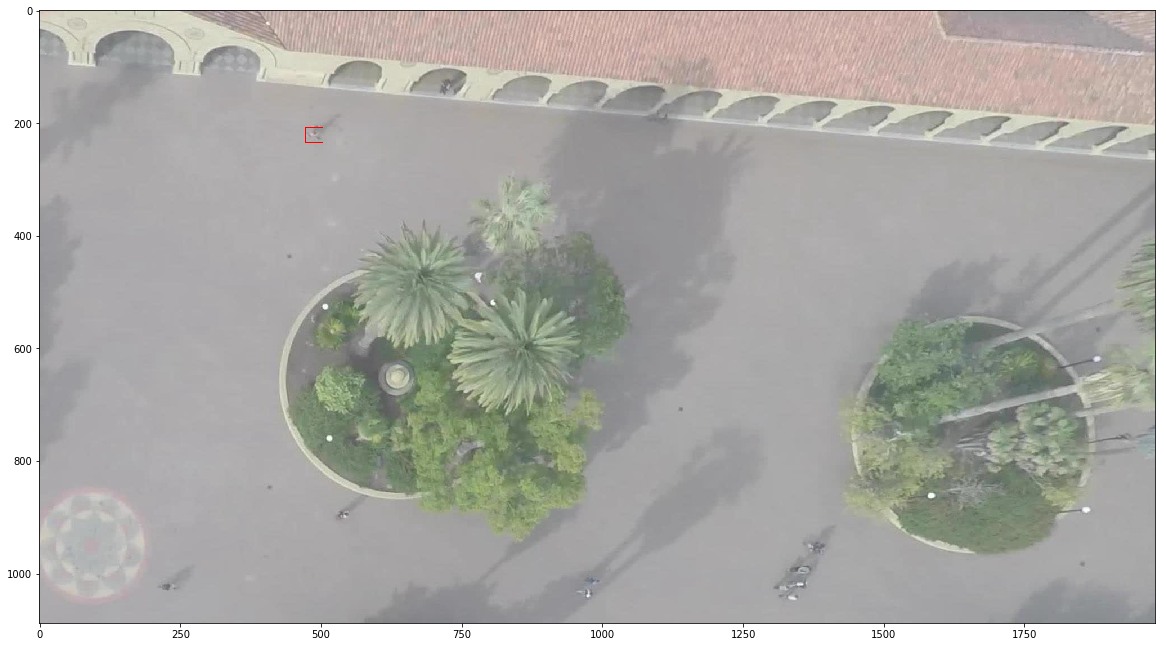

In [57]:
plt.figure(figsize=(20,30))
plt.imshow(video_frames[0])

In [82]:
for i,tag in enumerate(tags):  
    color=(255,0,0)
    if int(tag[6]) == 1:
        color=(0,255,0)
    cv2.rectangle(video_frames[int(tag[5])], (int(tag[1]),int(tag[2])), (int(tag[3]),int(tag[4])), color)
    print("Done tag {} out of {}".format(i, len(tags)))

Done tag 0 out of 5090
Done tag 1 out of 5090
Done tag 2 out of 5090
Done tag 3 out of 5090
Done tag 4 out of 5090
Done tag 5 out of 5090
Done tag 6 out of 5090
Done tag 7 out of 5090
Done tag 8 out of 5090
Done tag 9 out of 5090
Done tag 10 out of 5090
Done tag 11 out of 5090
Done tag 12 out of 5090
Done tag 13 out of 5090
Done tag 14 out of 5090
Done tag 15 out of 5090
Done tag 16 out of 5090
Done tag 17 out of 5090
Done tag 18 out of 5090
Done tag 19 out of 5090
Done tag 20 out of 5090
Done tag 21 out of 5090
Done tag 22 out of 5090
Done tag 23 out of 5090
Done tag 24 out of 5090
Done tag 25 out of 5090
Done tag 26 out of 5090
Done tag 27 out of 5090
Done tag 28 out of 5090
Done tag 29 out of 5090
Done tag 30 out of 5090
Done tag 31 out of 5090
Done tag 32 out of 5090
Done tag 33 out of 5090
Done tag 34 out of 5090
Done tag 35 out of 5090
Done tag 36 out of 5090
Done tag 37 out of 5090
Done tag 38 out of 5090
Done tag 39 out of 5090
Done tag 40 out of 5090
Done tag 41 out of 5090
Do

In [75]:
fourcc

1734701162.0

In [76]:
writer = cv2.VideoWriter()
size = (int(size[0]), int(size[1]))
# fps = cap.get(5)
# fourcc = cap.get(6)
# size = (cap.get(3), cap.get(4))

writer.open(r'/home/ubuntu/stanford_aerial/videos/quad/video0/video_tagged.mov',
           int(fourcc),
            fps,
            size)

for frame in video_frames:
    writer.write(frame)

writer.release()
cv2.destroyAllWindows()


In [83]:
writer = cv2.VideoWriter()
size = (int(size[0]), int(size[1]))
# fps = cap.get(5)
# fourcc = cap.get(6)
# size = (cap.get(3), cap.get(4))

writer.open(r'/home/ubuntu/stanford_aerial/videos/quad/video0/video_tagged_less_fps.mov',
           int(fourcc),
            fps/5,
            size)

i=0
for frame in video_frames:
    if i%5 == 0:
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        writer.write(frame)
    i+=1

writer.release()
cv2.destroyAllWindows()



In [4]:
import pascal_voc_writer
pascal_voc_writer.Writer.save?

Signature: pascal_voc_writer.Writer.save(self, annotation_path)
Docstring: <no docstring>
File:      ~/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pascal_voc_writer/__init__.py
Type:      function


In [11]:
video_series='quad'
video_num = 'video3'

video_frames = []
cap = cv2.VideoCapture(r'/home/ubuntu/stanford_aerial/videos/{}/{}/video.mov'.format(video_series,video_num))

fps = cap.get(cv2.CAP_PROP_FRAME_WIDTH )
fourcc = cap.get(6)
size = (cap.get(3), cap.get(4))
video_length = int(cap.get(7))

print(fps, fourcc, size, video_length)
cap.release()
cv2.destroyAllWindows()


1983.0 1734701162.0 (1983.0, 1088.0) 509
